(sec:visualization_2)=
# matplotlib.pyplot 2부

**참고**

웨스 맥키니의 [<파이썬 라이브러리를 활용한 데이터 분석>](https://github.com/wesm/pydata-book)의 
9장1절에 사용된 소스코드의 일부를 활용한다.

**기본 설정**

In [1]:
import numpy as np
import pandas as pd

맷플롯립<font size='2'>Matplotlib</font>은 간단한 그래프 도구를 제공하는 라이브러리다. 
맷플롯립의 대부분의 함수는 파이플롯<font size='2'>pyplot</font> 모듈에 포함되어 있으며
관행적으로 `plt` 별칭으로 불러온다.

In [2]:
import matplotlib.pyplot as plt

`datetime.datetime` 자료형은 시간(날짜) 데이터를 다룬다.

In [3]:
from datetime import datetime

## `Figure` 객체와 서브플롯(subplot)

모든 그래프는 `Figure` 객체 내에 존재하며, `plt.figure()` 함수에 의해 생성된다.

```python
fig = plt.figure()
```

`Figure` 객체 내에 그래프를 그리려면 서브플롯(subplot)을 지정해야 한다.
아래 코드는 `add_subplot()` 함수를 이용하여 지정된 `Figure` 객체안에 그래프를 그릴 공간을 준비한다.
(nrows, ncols, index) 형식의 인자의 의미는 다음과 같다.

- nrows: 이미지 행의 개수
- ncols: 이미지 칸의 개수
- index: 이미지의 인덱스. 1부터 시작.

만약 2x2 모양으로 총 4개의 이미지를 생성하려면 아래와 같이 실행한다.

```python
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
```

**그래프 삽입하기**

두 가지 방식으로 각각의 서브플롯에 그림을 삽입할 수 있다.

*방식 1: `matplotlib.pyplot.plot()` 함수 활용*

이 방식은 항상 마지막에 선언된 서브플롯에 그래프를 그린다.
예를 들어 아래 코드는 무작위로 선택된 50개의 정수들의 누적합으로 이루어진 데이터를
파선 그래프로 그린다.

In [4]:
np.random.seed(12345)

data1 = np.random.randn(50).cumsum()
data2 = np.random.randn(50).cumsum()

* 2x1 모양의 2개 이미지 사용하기

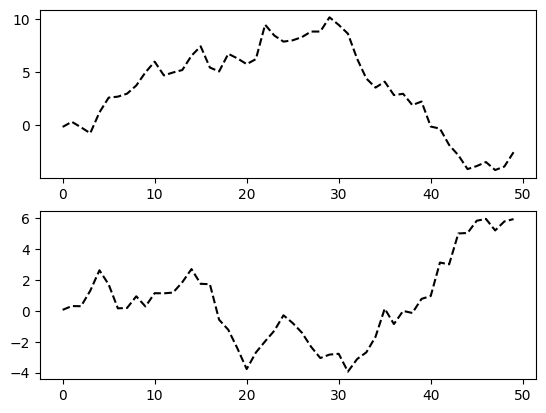

In [5]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1)
plt.plot(data1, 'k--')

ax2 = fig.add_subplot(2, 1, 2)
plt.plot(data2, 'k--')

* 1x2 모양의 2개 이미지 사용하기

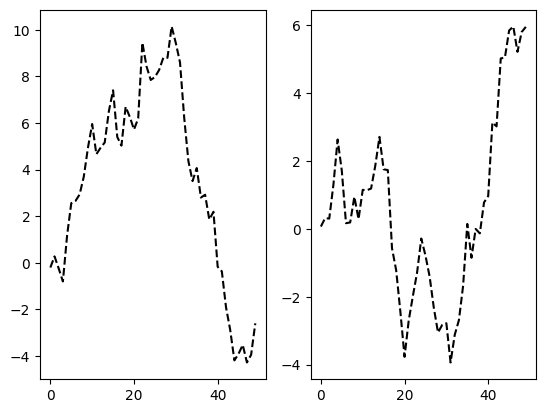

In [6]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
plt.plot(data1, 'k--')

ax2 = fig.add_subplot(1, 2, 2)
plt.plot(data2, 'k--')

*방식 2: `객체명.plot()` 함수 활용*

특정 서브플롯에 그래프를 삽입하려면 서브플롯 객체의 이름과 함께 `plot()` 함수 등을 호출해야 한다.

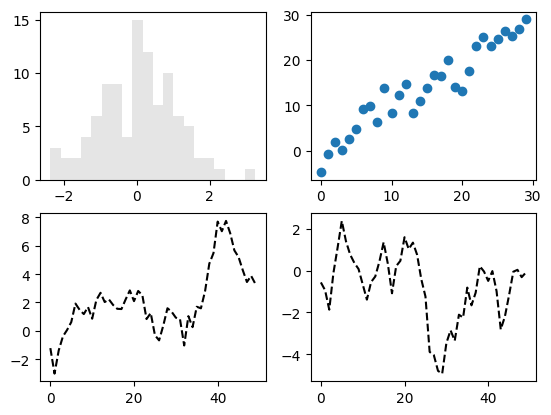

In [7]:
np.random.seed(12345)

fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# 위치: (2, 2, 1)
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=.1)
# 위치: (2, 2, 2)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
# 위치: (2, 2, 3)
ax3.plot(np.random.randn(50).cumsum(), 'k--')  # 누적합
# 위치: (2, 2, 4)
ax4.plot(np.random.randn(50).cumsum(), 'k--')  # 누적합

plt.show()

`Figure` 객체의 크기는 `plt.rc()` 함수를 이용해서 아래와 같이 지정한다.
`plt.rc()` 함수의 자세한 활용법은 잠시 뒤에 보다 자세히 살펴 본다.

In [8]:
plt.rc('figure', figsize=(10, 6))

이제 네 개의 이미지가 보다 적절한 크기로 그려진다.

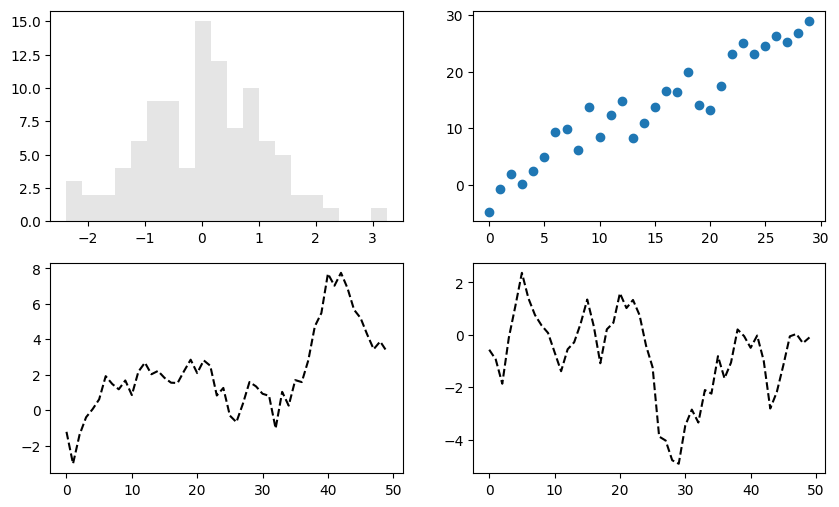

In [9]:
np.random.seed(12345)

fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# 위치: (2, 2, 1)
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=.1)
# 위치: (2, 2, 2)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
# 위치: (2, 2, 3)
ax3.plot(np.random.randn(50).cumsum(), 'k--')
# 위치: (2, 2, 4)
ax4.plot(np.random.randn(50).cumsum(), 'k--')

plt.show()

**서브플롯 관리**

`matplotlib.pyplot.subplots()` 함수는 여러 개의 서브플롯을 포함하는 `Figure` 객체를 관리해준다.
예를 들어, 아래 코드는 2x3 크기의 서브플롯을 담은 (2,3) 모양의 넘파이 어레이로 생성한다.

* 반환값: `Figure` 객체와 지정된 크기의 넘파이 어레이. 각 항목은 서브플롯 객체임.

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

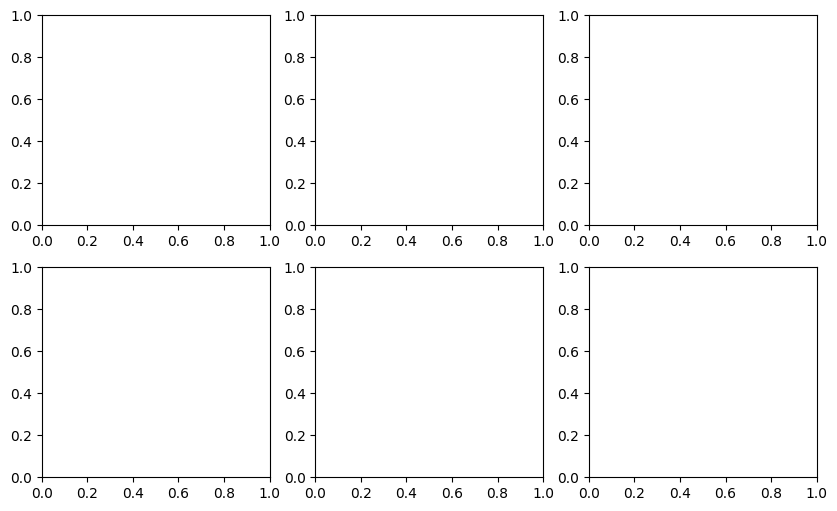

In [10]:
fig, axes = plt.subplots(2, 3)
axes

x 축 또는 y 축 눈금을 공유할 수 있다.

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

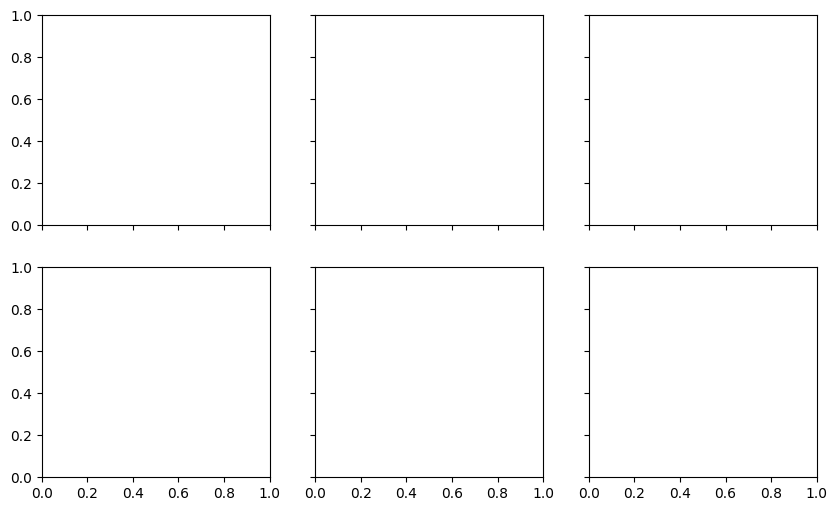

In [11]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True)  # 한 plot에만 눈금표시
axes

`plt.subplots_adjust()` 함수는 각 서브플롯 사이의 여백을 조절하는 방식을 보여준다. 
여백의 크기는 그래프의 크기와 숫자에 의존한다.

* 여백이 0일 때:

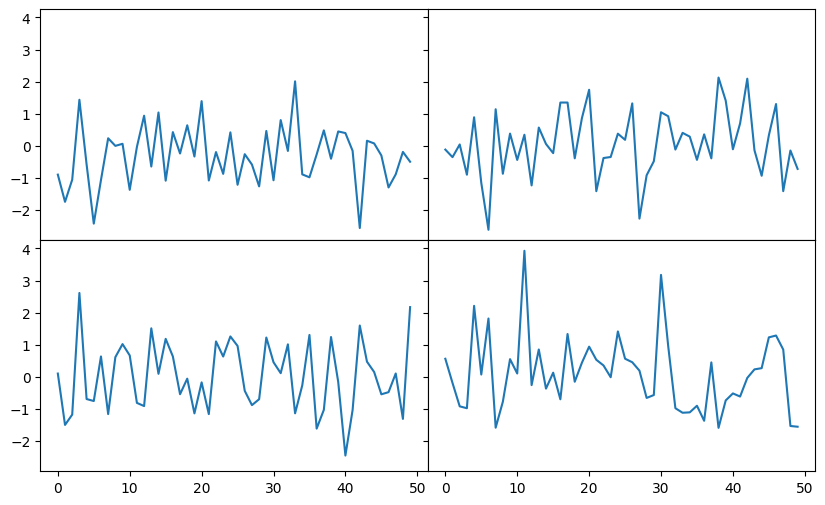

In [12]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes[i, j].plot(np.random.randn(50))

plt.subplots_adjust(wspace=0, hspace=0) # 상하좌우 여백: 0

* 여백이 0.1일 때:

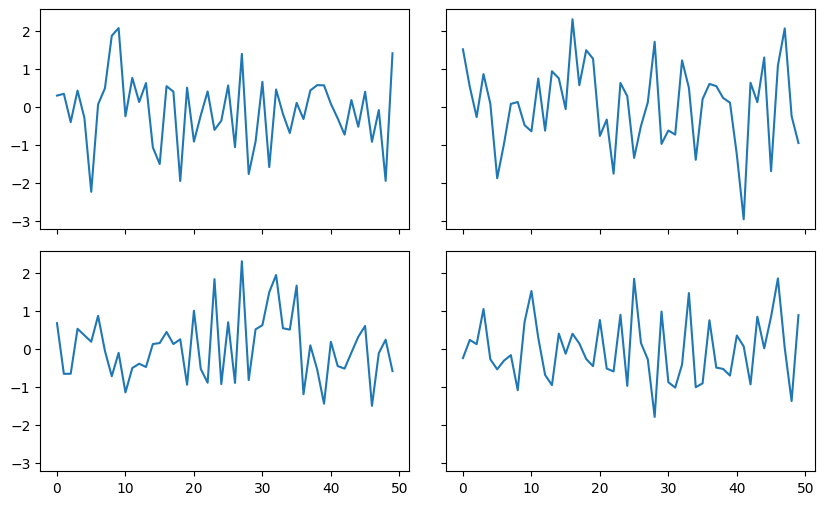

In [13]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes[i, j].plot(np.random.randn(50))

plt.subplots_adjust(wspace=0.1, hspace=0.1) # 상하좌우 여백: 0.1

## 눈금과 라벨

**이미지 타이틀, 축 이름, 눈금, 눈금 이름 지정**

두 가지 방식으로 진행할 수 있다.

*방식 1: 파이플롯 객체의 메서드 활용*

- `set_xticks()` 함수: 눈금 지정
- `set_xticklabels()` 함수: 눈금 라벨 지정
- `set_title()` 함수: 그래프 타이틀 지정
- `set_xlabel()` 함수: x축 이름 지정

In [14]:
data = np.random.randn(100).cumsum()

Text(0.5, 0, 'Levels')

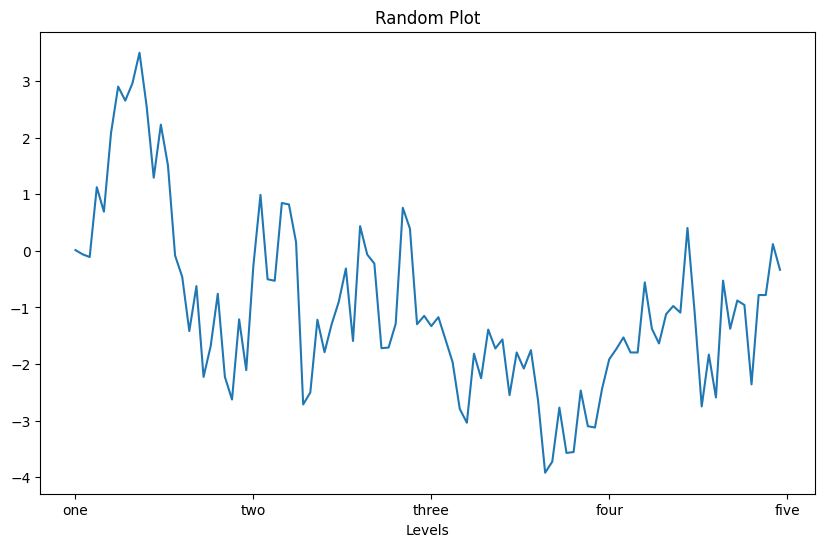

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data)

ticks = ax.set_xticks([0, 25, 50, 75, 100])  # 눈금
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'])  # 눈금의 설명

ax.set_title('Random Plot')
ax.set_xlabel('Levels')

눈금 크기와 방향도 지정할 수 있다.

Text(0.5, 0, 'Levels')

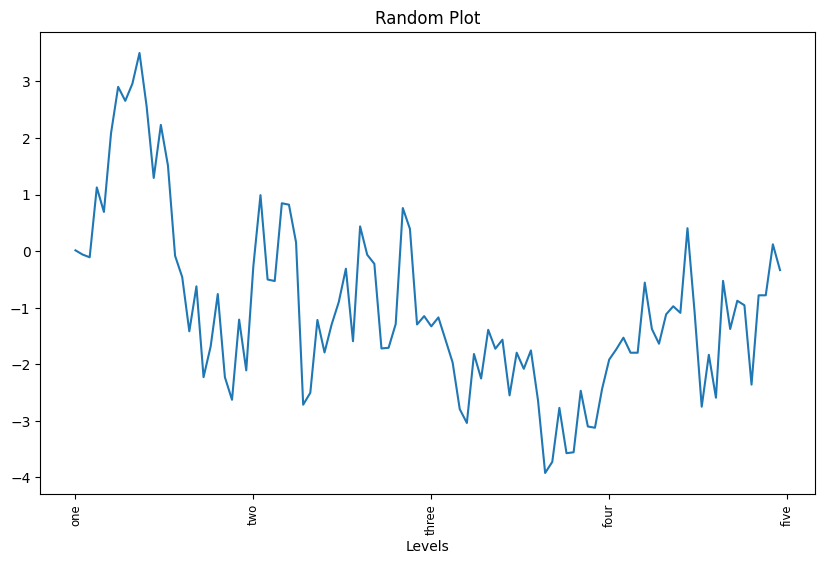

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data)

ticks = ax.set_xticks([0, 25, 50, 75, 100])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=90, fontsize='small')  # 글씨를 90도 돌림

ax.set_title('Random Plot')
ax.set_xlabel('Levels')

*방식 2: pyplot 모듈의 함수 활용*

이 방식은 마지막에 선언된 서브플롯에 대해서만 작동한다.

- `plt.xticks()` 함수: 눈금 및 눈금 라벨 지정
- `plt.title()` 함수: 그래프 타이틀 지정
- `plt.xlabel()` 함수: x축 이름 지정

Text(0.5, 0, 'Levels')

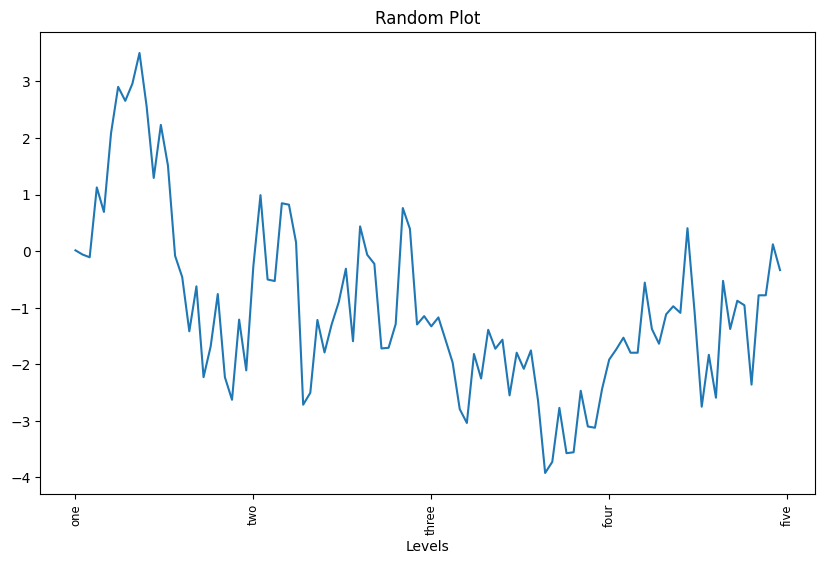

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data)

plt.xticks([0, 25, 50, 75, 100], ['one', 'two', 'three', 'four', 'five'],
            rotation=90, fontsize='small')

plt.title('Random Plot')
plt.xlabel('Levels')

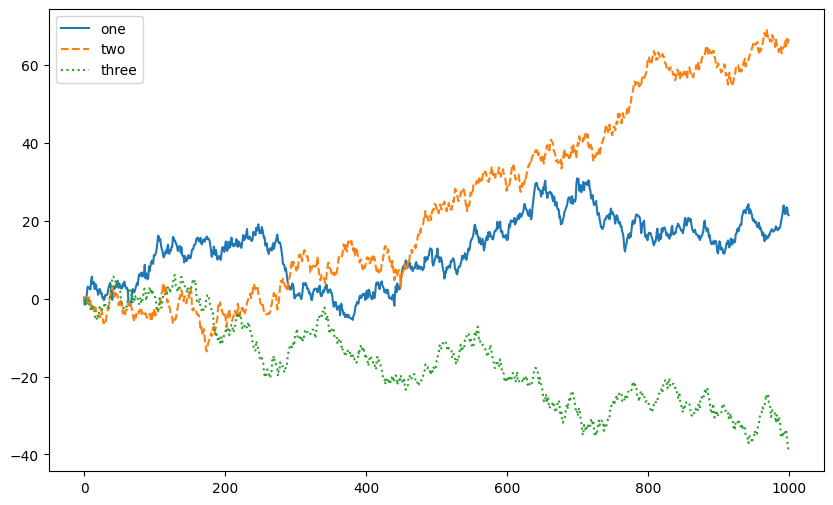

In [18]:
np.random.seed(17)

fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), label="one")
ax.plot(np.random.randn(1000).cumsum(), linestyle="dashed", label="two")
ax.plot(np.random.randn(1000).cumsum(), linestyle="dotted", label="three")
ax.legend()

## 그래프 저장

가장 최근에 생성된 그래프를 가리키는 `Figure` 객체를 이미지 파일로 저장할 수 있다.

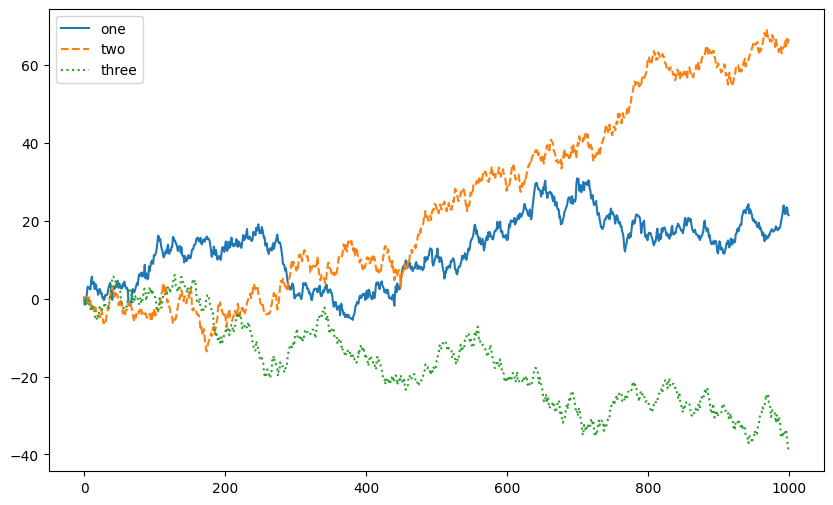

In [19]:
fig

In [20]:
type(fig)

matplotlib.figure.Figure

`Figure` 객체의 `savefig()` 함수를 이용한다.
파일명의 확장장에 맞춰 적절한 포맷<font size='2'>format</font>으로 저장되며,
dpi를 지정하여 저장된 이미지 파일의 해상도를 조절할 수 있다.

In [22]:
fig.savefig("/Users/kimdohyeon/건양대학교병원_바이오헬스/Biomedical_AI_Train/Visualization/random.png", dpi=400)

:::{admonition} dpi
:class: info

dpi는 dots for inch, 즉 1인치(2.54cm)당 디지털 프린터가 찍을 수 있는 점(dot)의 수를 가리키며, 값이 클 수록 
저장된 사진의 해상도가 높아진다.
:::

## 그래프 스타일 지정

- 참고: [Style sheets reference](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

In [ ]:
plt.style.use('grayscale')

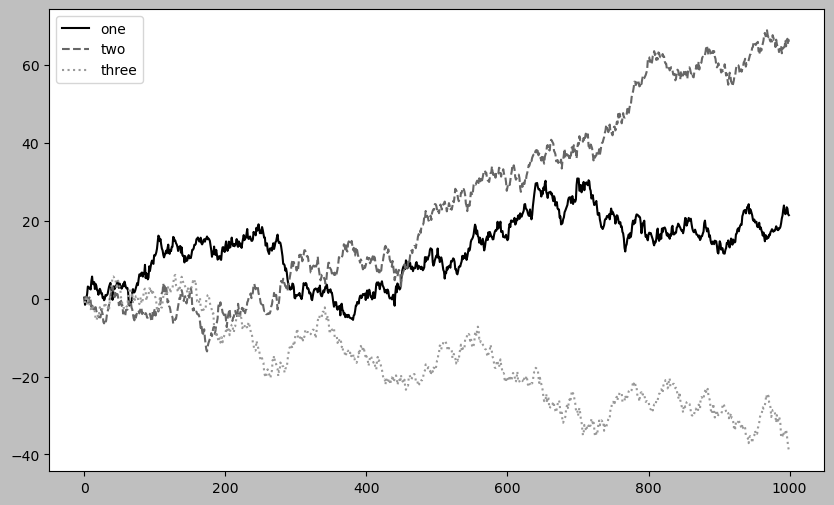

In [ ]:
np.random.seed(17)

fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), label="one")
ax.plot(np.random.randn(1000).cumsum(), linestyle="dashed", label="two")
ax.plot(np.random.randn(1000).cumsum(), linestyle="dotted", label="three")
ax.legend()

In [ ]:
plt.style.use('dark_background')

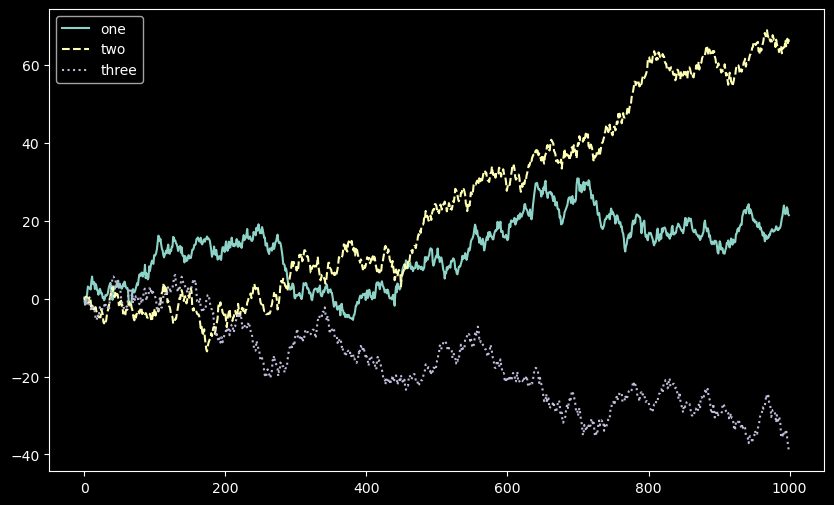

In [ ]:
np.random.seed(17)

fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), label="one")
ax.plot(np.random.randn(1000).cumsum(), linestyle="dashed", label="two")
ax.plot(np.random.randn(1000).cumsum(), linestyle="dotted", label="three")
ax.legend()

In [ ]:
plt.style.use('ggplot')

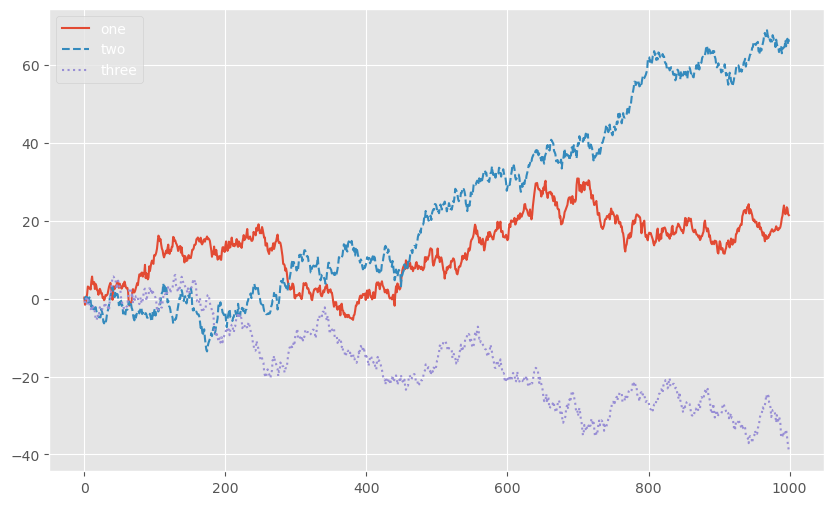

In [ ]:
np.random.seed(17)

fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), label="one")
ax.plot(np.random.randn(1000).cumsum(), linestyle="dashed", label="two")
ax.plot(np.random.randn(1000).cumsum(), linestyle="dotted", label="three")
ax.legend()

In [ ]:
plt.style.use('Solarize_Light2')

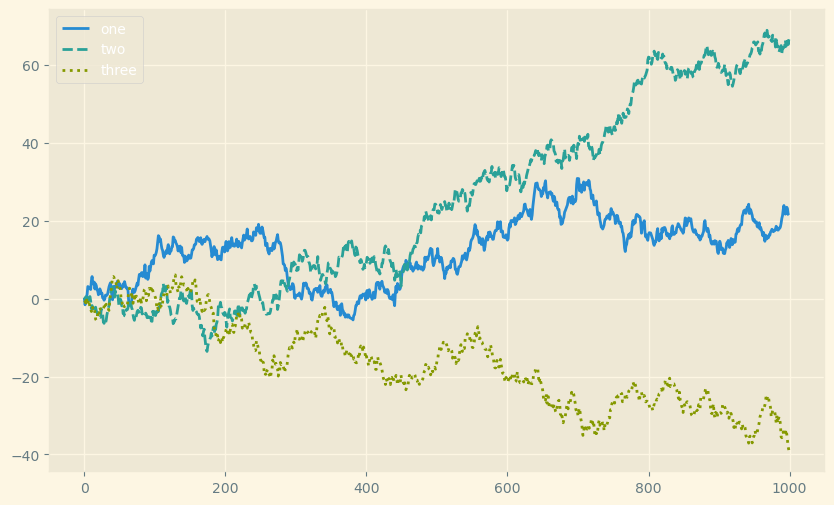

In [ ]:
np.random.seed(17)

fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), label="one")
ax.plot(np.random.randn(1000).cumsum(), linestyle="dashed", label="two")
ax.plot(np.random.randn(1000).cumsum(), linestyle="dotted", label="three")
ax.legend()

In [ ]:
plt.style.use('seaborn-v0_8')

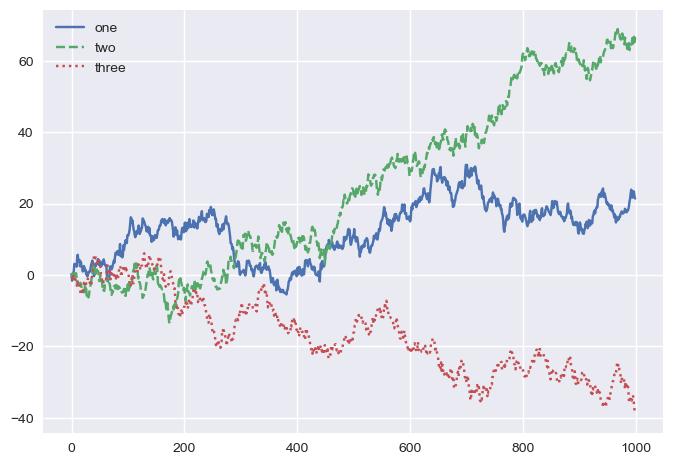

In [ ]:
np.random.seed(17)

fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), label="one")
ax.plot(np.random.randn(1000).cumsum(), linestyle="dashed", label="two")
ax.plot(np.random.randn(1000).cumsum(), linestyle="dotted", label="three")
ax.legend()

In [ ]:
plt.style.use('seaborn-v0_8-colorblind')

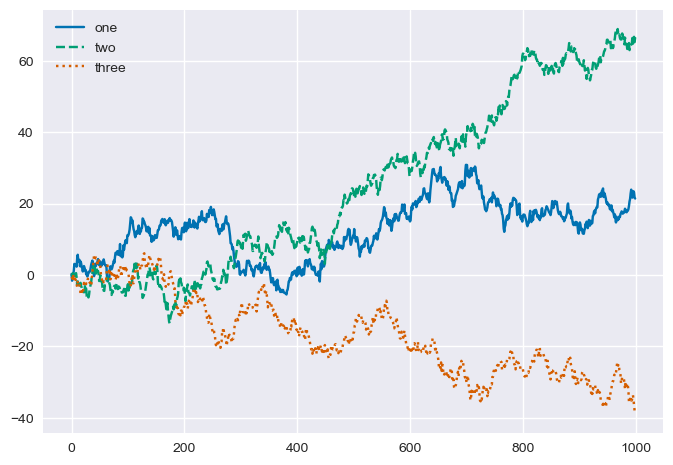

In [ ]:
np.random.seed(17)

fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), label="one")
ax.plot(np.random.randn(1000).cumsum(), linestyle="dashed", label="two")
ax.plot(np.random.randn(1000).cumsum(), linestyle="dotted", label="three")
ax.legend()

## matplotlib 기본 설정

`plt.rc()` 함수를 이용하여 matplot을 이용하여 생성되는 이미지 관련 설정을 전역적으로 지정할 수 있다.
사용되는 형식은 다음과 같다.

- 첫째 인자: 속성 지정
- 둘째 인자: 속성값 지정

__참고:__ 'rc' 는 기본설정을 의미하는 단어로 많이 사용된다. 
풀어 쓰면 "Run at startup and they Configure your stuff", 
즉, "프로그램이 시작할 때 기본값들을 설정한다"의 의미이다.
'.vimrc', '.bashrc', '.zshrc' 등 많은 애플리케이션의 초기설정 파일명에 사용되곤 한다.

아래 코드는 다양한 속성을 지정하는 방식을 보여준다.

* 이미지 사이즈 지정

In [ ]:
plt.rc('figure', figsize=(10, 6))

* 선 속성 지정

In [ ]:
plt.rc('lines', linewidth=3, color='b')

* 텍스트 폰트 속성 지정

In [ ]:
font_options = {'family' : 'serif',
                'weight' : 'bold',
                'size'   : '13'}

plt.rc('font', **font_options) # plt.rc('font', family='serif', weight='bold', size=13)

* 그래프 구성 요소의 색상 지정

In [ ]:
plt.rcParams['text.color'] = 'red'
plt.rcParams['xtick.color'] = 'green'
plt.rcParams['ytick.color'] = '#CD5C5C'  # RGB 색상

아래 코드는 앞서 설정된 다양한 속성을 반영한 결과를 보여준다.

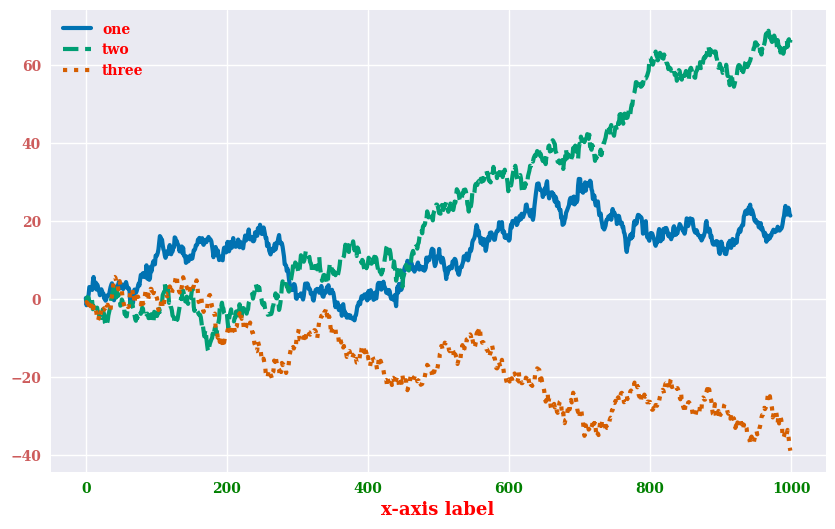

In [ ]:
np.random.seed(17)

fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), label="one")
ax.plot(np.random.randn(1000).cumsum(), linestyle="dashed", label="two")
ax.plot(np.random.randn(1000).cumsum(), linestyle="dotted", label="three")

ax.set_xlabel("x-axis label")
ax.legend()

In [ ]:
plt.close('all')

## 연습문제

참고: [(실습) matplotlib.pyplot 2부](https://colab.research.google.com/github/codingalzi/datapy/blob/master/practices/practice-data_visualization_pyplot2.ipynb)